Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

# 1.Data Collection

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('AirQualityUCI.xlsx')

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,NaN,NaN


In [4]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824,NaN,NaN
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864,NaN,NaN
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649,NaN,NaN
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866,NaN,NaN
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804,NaN,NaN


In [5]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604,NaN,NaN
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275,NaN,NaN
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823,NaN,NaN
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223,NaN,NaN
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036,NaN,NaN


In [6]:
data.shape

(9357, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Unnamed: 15    0 non-

# 2. Pre-Processing

In [8]:
#droping columns which are not necessary 

In [9]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [10]:
data.drop('Unnamed: 15',axis =1, inplace=True)

In [11]:
data.drop('Unnamed: 16',axis =1, inplace=True)

In [12]:
data.drop('NMHC(GT)',axis =1, inplace = True)

# a) Missing Value Handling

In [13]:
# Identifying missing values
for i in data.columns:
    print(i,":",data[i].where(data[i] == -200).count())

Date : 0
Time : 0
CO(GT) : 1683
PT08.S1(CO) : 366
C6H6(GT) : 366
PT08.S2(NMHC) : 366
NOx(GT) : 1639
PT08.S3(NOx) : 366
NO2(GT) : 1642
PT08.S4(NO2) : 366
PT08.S5(O3) : 366
T : 366
RH : 366
AH : 366


In [14]:
# Replace the missing value(-200) as nan
data2=data.select_dtypes(exclude=['datetime64','object'])
data2
for i in data2.columns:
    data2[i] = np.where(data2[i]== -200, np.nan, data2[i])
data2.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

<AxesSubplot:>

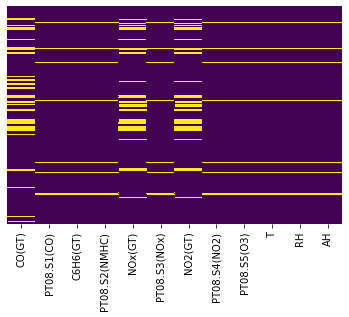

In [15]:
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

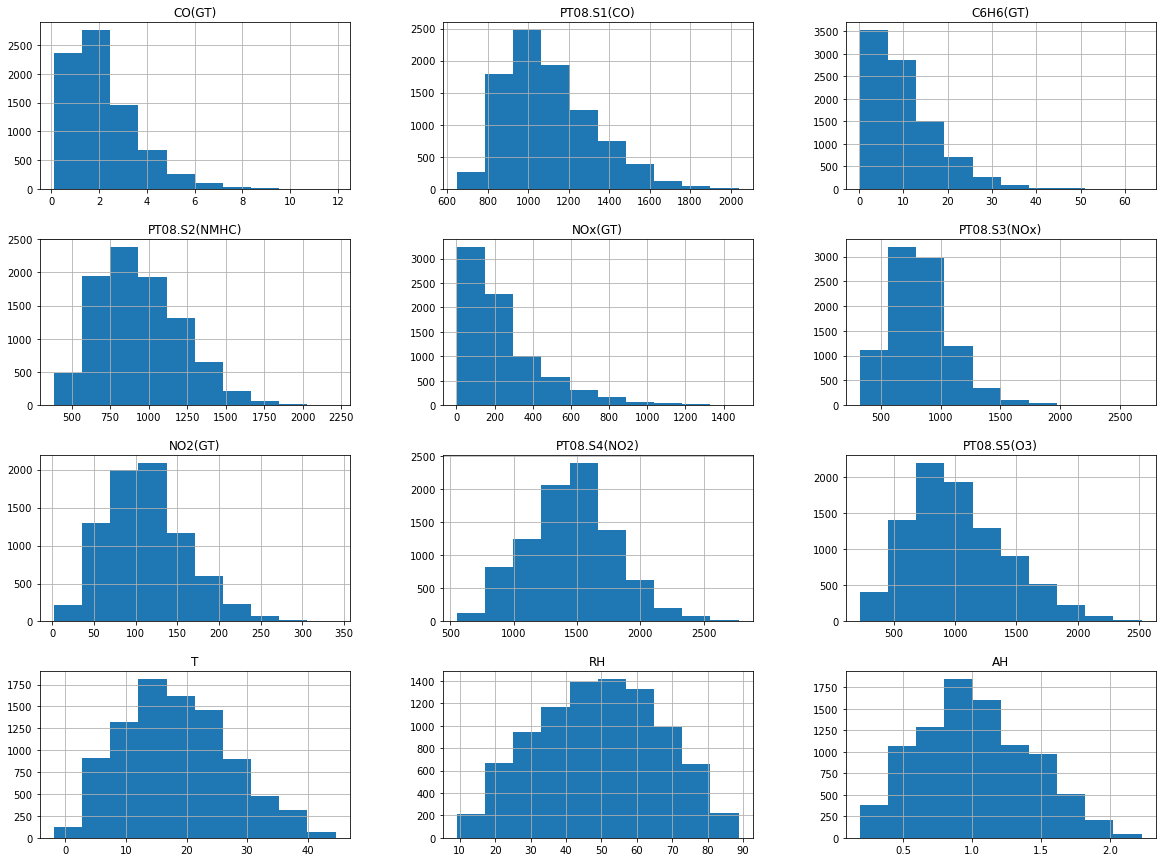

In [16]:
freqgraph = data2.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [17]:
#filling null values with median which are having skew in graphs

data2['CO(GT)'] = data2['CO(GT)'].fillna(data['CO(GT)'].median())
data2['PT08.S1(CO)'] = data2['PT08.S1(CO)'].fillna(data['PT08.S1(CO)'].median())
data2['C6H6(GT)'] = data2['C6H6(GT)'].fillna(data['C6H6(GT)'].median())
data2['PT08.S2(NMHC)'] = data2['PT08.S2(NMHC)'].fillna(data['PT08.S2(NMHC)'].median())
data2['NO2(GT)'] = data2['NO2(GT)'].fillna(data['NO2(GT)'].median())
data2['NOx(GT)'] = data2['NOx(GT)'].fillna(data['NOx(GT)'].median())
data2['PT08.S5(O3)'] = data2['PT08.S5(O3)'].fillna(data['PT08.S5(O3)'].median())
data2['PT08.S3(NOx)'] = data2['PT08.S3(NOx)'].fillna(data['PT08.S3(NOx)'].median())

In [18]:
#filling null values with mean which does not have any skew

data2['PT08.S4(NO2)'] = data2['PT08.S4(NO2)'].fillna(data['PT08.S4(NO2)'].mean())
data2['T'] = data2['T'].fillna(data['T'].mean())
data2['RH'] = data2['RH'].fillna(data['RH'].mean())
data2['AH'] = data2['AH'].fillna(data['AH'].mean())

In [19]:
#Rechecking null values
data2.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# b) Outlier detection and handling

In [20]:
#Finding outliers

In [21]:
data2.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

Text(0.5, 1.0, 'Box plot of CO(GT)')

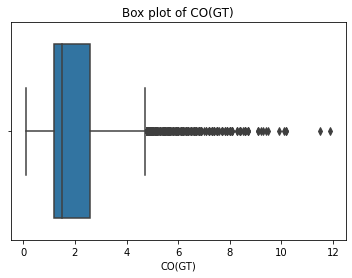

In [22]:
sns.boxplot(data2['CO(GT)'])
plt.title('Box plot of CO(GT)')

In [23]:
Q1 = np.percentile(data2['CO(GT)'],25 , interpolation= 'midpoint')
Q2 = np.percentile(data2['CO(GT)'],50 , interpolation= 'midpoint')
Q3 = np.percentile(data2['CO(GT)'],75 , interpolation= 'midpoint')
print(Q1)
print(Q2)
print(Q3)

1.2
1.5
2.6


In [24]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-0.9000000000000001
4.7


In [25]:
outlier = []
for x in data2['CO(GT)']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [26]:
ind1 = data2['CO(GT)']>up_lim
data2.loc[ind1].index

Int64Index([  24,   25,   26,   50,   53,   98,  110,  111,  112,  120,
            ...
            9073, 9074, 9097, 9098, 9099, 9120, 9121, 9122, 9206, 9350],
           dtype='int64', length=454)

<AxesSubplot:xlabel='CO(GT)'>

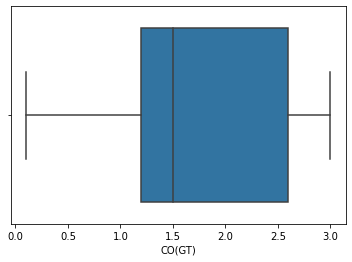

In [27]:
ninetieth_percentile = int(np.percentile(data2['CO(GT)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
data2['CO(GT)'] = np.where(data2['CO(GT)']>ninetieth_percentile, ninetieth_percentile, data2['CO(GT)'])

sns.boxplot(data2['CO(GT)'])

Text(0.5, 1.0, 'Box plot of PT08.S1(CO)')

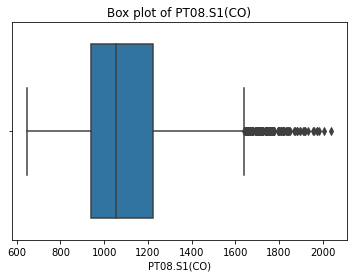

In [28]:
sns.boxplot(data2['PT08.S1(CO)'])
plt.title('Box plot of PT08.S1(CO)')

In [29]:
Q1 = np.percentile(data2['PT08.S1(CO)'],25 , interpolation= 'midpoint')
Q2 = np.percentile(data2['PT08.S1(CO)'],50 , interpolation= 'midpoint')
Q3 = np.percentile(data2['PT08.S1(CO)'],75 , interpolation= 'midpoint')
print(Q1)
print(Q2)
print(Q3)

941.25
1052.5
1221.25


In [30]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

521.25
1641.25


In [31]:
outlier = []
for x in data2['PT08.S1(CO)']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [32]:
ind1 = data2['PT08.S1(CO)']>up_lim
data2.loc[ind1].index

Int64Index([  25,   50,   53,   97,   98,  110,  111,  112,  120,  121,
            ...
            8141, 8142, 8143, 8882, 9015, 9074, 9097, 9098, 9099, 9121],
           dtype='int64', length=145)

<AxesSubplot:xlabel='PT08.S1(CO)'>

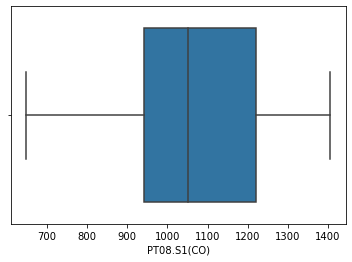

In [33]:
ninetieth_percentile = int(np.percentile(data2['PT08.S1(CO)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
data2['PT08.S1(CO)'] = np.where(data2['PT08.S1(CO)']>ninetieth_percentile, ninetieth_percentile, data2['PT08.S1(CO)'])

sns.boxplot(data2['PT08.S1(CO)'])

Text(0.5, 1.0, 'Box plot of C6H6(GT)')

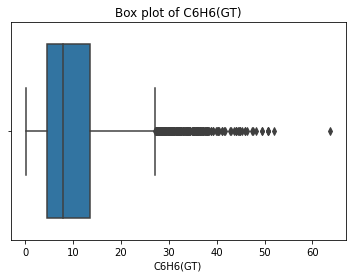

In [34]:
sns.boxplot(data2['C6H6(GT)'])
plt.title('Box plot of C6H6(GT)')

In [35]:
Q1 = np.percentile(data2['C6H6(GT)'],25 , interpolation= 'midpoint')
Q2 = np.percentile(data2['C6H6(GT)'],50 , interpolation= 'midpoint')
Q3 = np.percentile(data2['C6H6(GT)'],75 , interpolation= 'midpoint')
print(Q1)
print(Q2)
print(Q3)

4.591495033754221
7.886652812465704
13.636091225089844


In [36]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-8.975399253249215
27.202985512093278


In [37]:
outlier = []
for x in data2['C6H6(GT)']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [38]:
ind1 = data2['C6H6(GT)']>up_lim
data2.loc[ind1].index

Int64Index([  25,   50,  111,  120,  121,  122,  159,  169,  170,  171,
            ...
            8858, 8881, 8882, 9015, 9025, 9039, 9073, 9074, 9097, 9098],
           dtype='int64', length=281)

<AxesSubplot:xlabel='C6H6(GT)'>

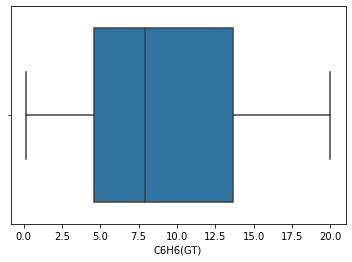

In [39]:
ninetieth_percentile = int(np.percentile(data2['C6H6(GT)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
data2['C6H6(GT)'] = np.where(data2['C6H6(GT)']>ninetieth_percentile, ninetieth_percentile, data2['C6H6(GT)'])

sns.boxplot(data2['C6H6(GT)'])

Text(0.5, 1.0, 'Box plot of PT08.S2(NMHC)')

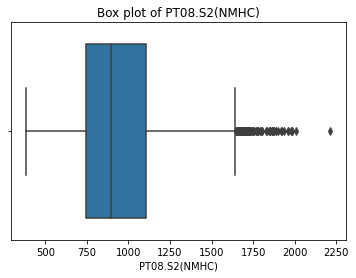

In [40]:
sns.boxplot(data2['PT08.S2(NMHC)'])
plt.title('Box plot of PT08.S2(NMHC)')

In [41]:
Q1 = np.percentile(data2['PT08.S2(NMHC)'],25 , interpolation= 'midpoint')
Q2 = np.percentile(data2['PT08.S2(NMHC)'],50 , interpolation= 'midpoint')
Q3 = np.percentile(data2['PT08.S2(NMHC)'],75 , interpolation= 'midpoint')
print(Q1)
print(Q2)
print(Q3)

742.5
894.5
1104.75


In [42]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

199.125
1648.125


In [43]:
outlier = []
for x in data2['PT08.S2(NMHC)']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [44]:
ind1 = data2['PT08.S2(NMHC)']>up_lim
data2.loc[ind1].index

Int64Index([ 111,  121,  159,  169,  170,  183,  998, 1033, 1190, 1454, 1489,
            1502, 1646, 1670, 1839, 1862, 2150, 2174, 3158, 3206, 4190, 4238,
            4359, 4489, 4657, 4670, 4694, 4848, 4849, 4886, 4895, 4992, 4993,
            5016, 5017, 5041, 5054, 5065, 5066, 5327, 5328, 5342, 5366, 5375,
            5376, 5377, 5401, 5424, 5425, 5495, 5496, 5497, 5519, 5520, 5521,
            5567, 5684, 5687, 5688, 5689, 5690, 5735, 5736, 5751, 5759, 5760,
            6047, 6048, 6159, 6160, 6168, 6169, 6191, 6192, 6193, 6194, 6218,
            6263, 6264, 6266, 6408, 6409, 6410, 6672, 6673, 6913, 6914, 7512,
            7513, 7610, 7611, 9098],
           dtype='int64')

<AxesSubplot:xlabel='PT08.S2(NMHC)'>

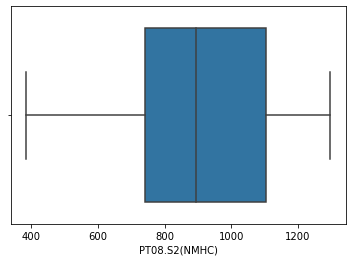

In [45]:
ninetieth_percentile = int(np.percentile(data2['PT08.S2(NMHC)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
data2['PT08.S2(NMHC)'] = np.where(data2['PT08.S2(NMHC)']>ninetieth_percentile, ninetieth_percentile, data2['PT08.S2(NMHC)'])

sns.boxplot(data2['PT08.S2(NMHC)'])

Text(0.5, 1.0, 'Box plot of NOx(GT)')

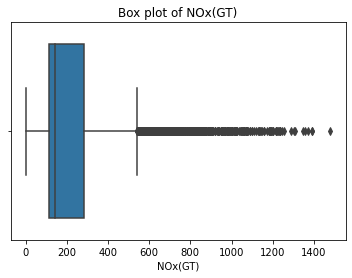

In [46]:
sns.boxplot(data2['NOx(GT)'])
plt.title('Box plot of NOx(GT)')

In [47]:
Q1 = np.percentile(data2['NOx(GT)'],25 , interpolation= 'midpoint')
Q2 = np.percentile(data2['NOx(GT)'],50 , interpolation= 'midpoint')
Q3 = np.percentile(data2['NOx(GT)'],75 , interpolation= 'midpoint')
print(Q1)
print(Q2)
print(Q3)

112.0
141.0
284.2


In [48]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-146.29999999999995
542.5


In [49]:
outlier = []
for x in data2['NOx(GT)']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [50]:
ind1 = data2['NOx(GT)']>up_lim
data2.loc[ind1].index

Int64Index([4381, 4383, 4384, 4392, 4406, 4489, 4490, 4491, 4536, 4537,
            ...
            9110, 9111, 9121, 9122, 9206, 9207, 9253, 9254, 9349, 9350],
           dtype='int64', length=778)

<AxesSubplot:xlabel='NOx(GT)'>

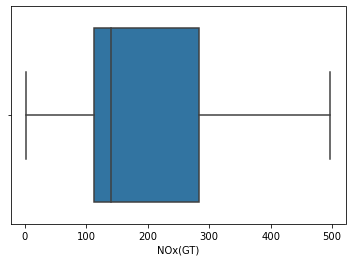

In [51]:
ninetieth_percentile = int(np.percentile(data2['NOx(GT)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
data2['NOx(GT)'] = np.where(data2['NOx(GT)']>ninetieth_percentile, ninetieth_percentile, data2['NOx(GT)'])

sns.boxplot(data2['NOx(GT)'])

Text(0.5, 1.0, 'Box plot of PT08.S3(NOx)')

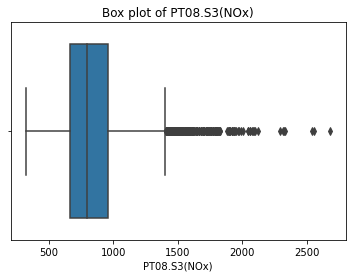

In [52]:
sns.boxplot(data2['PT08.S3(NOx)'])
plt.title('Box plot of PT08.S3(NOx)')

In [53]:
Q1 = np.percentile(data2['PT08.S3(NOx)'],25 , interpolation= 'midpoint')
Q2 = np.percentile(data2['PT08.S3(NOx)'],50 , interpolation= 'midpoint')
Q3 = np.percentile(data2['PT08.S3(NOx)'],75 , interpolation= 'midpoint')
print(Q1)
print(Q2)
print(Q3)

665.5
794.25
960.25


In [54]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

223.375
1402.375


In [55]:
outlier = []
for x in data2['PT08.S3(NOx)']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [56]:
ind1 = data2['PT08.S3(NOx)']>up_lim
data2.loc[ind1].index

Int64Index([   6,    7,    8,    9,   10,   11,   12,   13,   29,   33,
            ...
            8506, 8507, 8508, 8528, 8529, 8530, 8531, 8532, 8652, 8674],
           dtype='int64', length=277)

<AxesSubplot:xlabel='PT08.S3(NOx)'>

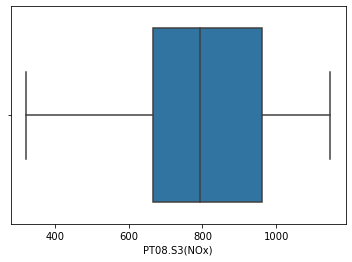

In [57]:
ninetieth_percentile = int(np.percentile(data2['PT08.S3(NOx)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
data2['PT08.S3(NOx)'] = np.where(data2['PT08.S3(NOx)']>ninetieth_percentile, ninetieth_percentile, data2['PT08.S3(NOx)'])

sns.boxplot(data2['PT08.S3(NOx)'])

Text(0.5, 1.0, 'Box plot of NO2(GT)')

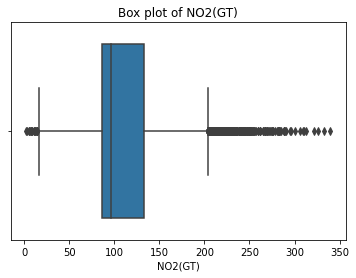

In [58]:
sns.boxplot(data2['NO2(GT)'])
plt.title('Box plot of NO2(GT)')

In [59]:
Q1 = np.percentile(data2['NO2(GT)'],25 , interpolation= 'midpoint')
Q2 = np.percentile(data2['NO2(GT)'],50 , interpolation= 'midpoint')
Q3 = np.percentile(data2['NO2(GT)'],75 , interpolation= 'midpoint')
print(Q1)
print(Q2)
print(Q3)

85.9
96.0
133.0


In [60]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

15.250000000000014
203.64999999999998


In [61]:
outlier = []
for x in data2['NO2(GT)']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [62]:
ind1 = data2['NO2(GT)']>up_lim
data2.loc[ind1].index

Int64Index([2184, 2185, 2208, 2209, 2687, 2688, 2856, 2857, 2881, 3072,
            ...
            8951, 8952, 8953, 8954, 8955, 9025, 9026, 9073, 9074, 9098],
           dtype='int64', length=360)

<AxesSubplot:xlabel='NO2(GT)'>

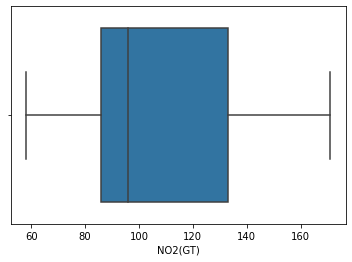

In [63]:
ninetieth_percentile = int(np.percentile(data2['NO2(GT)'], 90))
# the values above 90th percentile are replaced with 90th percentile value
data2['NO2(GT)'] = np.where(data2['NO2(GT)']>ninetieth_percentile, ninetieth_percentile, data2['NO2(GT)'])

tenth_percentile = int(np.percentile(data2['NO2(GT)'], 10))

# the values lesser than 10th percentile are replaced with 10th percentile value
data2['NO2(GT)'] = np.where(data2['NO2(GT)']<tenth_percentile, tenth_percentile, data2['NO2(GT)'])

sns.boxplot(data2['NO2(GT)'])

Text(0.5, 1.0, 'Box plot of PT08.S4(NO2)')

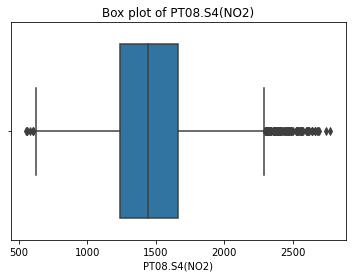

In [64]:
sns.boxplot(data2['PT08.S4(NO2)'])
plt.title('Box plot of PT08.S4(NO2)')

In [65]:
Q1 = np.percentile(data2['PT08.S4(NO2)'],25 , interpolation= 'midpoint')
Q2 = np.percentile(data2['PT08.S4(NO2)'],50 , interpolation= 'midpoint')
Q3 = np.percentile(data2['PT08.S4(NO2)'],75 , interpolation= 'midpoint')
print(Q1)
print(Q2)
print(Q3)

1241.5
1445.5
1662.0


In [66]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

610.75
2292.75


In [67]:
outlier = []
for x in data2['PT08.S4(NO2)']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [68]:
ind1 = data2['PT08.S4(NO2)']>up_lim
data2.loc[ind1].index

Int64Index([  25,   50,  110,  111,  120,  121,  122,  159,  169,  170,
            ...
            5690, 5735, 5736, 5759, 5760, 6192, 6193, 6194, 6264, 6409],
           dtype='int64', length=124)

<AxesSubplot:xlabel='PT08.S4(NO2)'>

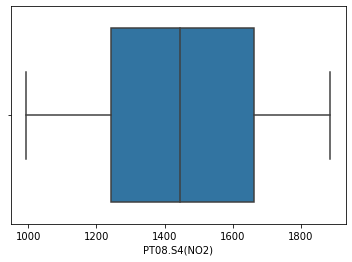

In [69]:
ninetieth_percentile = int(np.percentile(data2['PT08.S4(NO2)'], 90))
# the values above 90th percentile are replaced with 90th percentile value
data2['PT08.S4(NO2)'] = np.where(data2['PT08.S4(NO2)']>ninetieth_percentile, ninetieth_percentile, data2['PT08.S4(NO2)'])

tenth_percentile = int(np.percentile(data2['PT08.S4(NO2)'], 10))

# the values lesser than 10th percentile are replaced with 10th percentile value
data2['PT08.S4(NO2)'] = np.where(data2['PT08.S4(NO2)']<tenth_percentile, tenth_percentile, data2['PT08.S4(NO2)'])

sns.boxplot(data2['PT08.S4(NO2)'])

Text(0.5, 1.0, 'Box plot of PT08.S5(O3)')

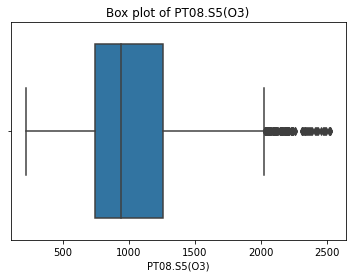

In [70]:
sns.boxplot(data2['PT08.S5(O3)'])
plt.title('Box plot of PT08.S5(O3)')

In [71]:
Q1 = np.percentile(data2['PT08.S5(O3)'],25 , interpolation= 'midpoint')
Q2 = np.percentile(data2['PT08.S5(O3)'],50 , interpolation= 'midpoint')
Q3 = np.percentile(data2['PT08.S5(O3)'],75 , interpolation= 'midpoint')
print(Q1)
print(Q2)
print(Q3)

741.75
942.0
1255.25


In [72]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-28.5
2025.5


In [73]:
outlier = []
for x in data2['PT08.S5(O3)']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [74]:
ind1 = data2['PT08.S5(O3)']>up_lim
data2.loc[ind1].index

Int64Index([ 111,  121,  147,  169,  170,  171,  183,  865, 1167, 1646,
            ...
            8139, 8140, 8141, 8142, 8143, 8737, 8738, 8882, 9074, 9098],
           dtype='int64', length=130)

<AxesSubplot:xlabel='PT08.S5(O3)'>

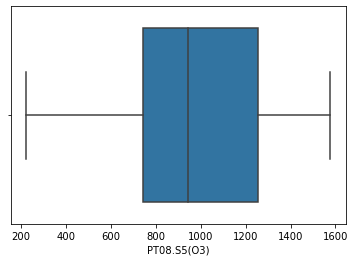

In [75]:
ninetieth_percentile = int(np.percentile(data2['PT08.S5(O3)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
data2['PT08.S5(O3)'] = np.where(data2['PT08.S5(O3)']>ninetieth_percentile, ninetieth_percentile, data2['PT08.S5(O3)'])

sns.boxplot(data2['PT08.S5(O3)'])

Text(0.5, 1.0, 'Box plot of T')

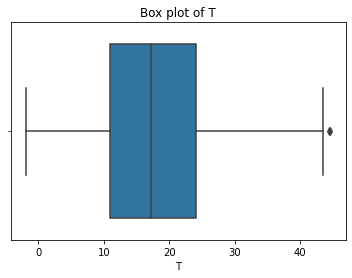

In [76]:
sns.boxplot(data2['T'])
plt.title('Box plot of T')

In [77]:
Q1 = np.percentile(data2['T'],25 , interpolation= 'midpoint')
Q2 = np.percentile(data2['T'],50 , interpolation= 'midpoint')
Q3 = np.percentile(data2['T'],75 , interpolation= 'midpoint')
print(Q1)
print(Q2)
print(Q3)

10.949999809265
17.200000286102
24.074999809265


In [78]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-8.737500190735004
43.76249980926501


In [79]:
outlier = []
for x in data2['T']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [80]:
ind1 = data2['T']>up_lim
data2.loc[ind1].index

Int64Index([3213, 3214], dtype='int64')

In [81]:
data2 = data2[(data2['T'] > low_lim) & (data2['T'] < up_lim)]

<AxesSubplot:xlabel='T'>

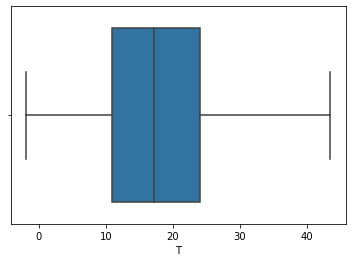

In [82]:
sns.boxplot(data2['T'])

Text(0.5, 1.0, 'Box plot of RH')

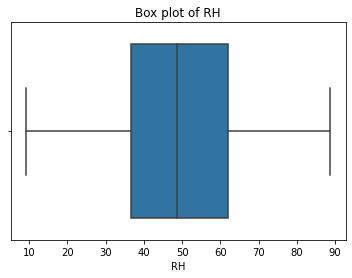

In [83]:
sns.boxplot(data2['RH'])
plt.title('Box plot of RH')

Text(0.5, 1.0, 'Box plot of AH')

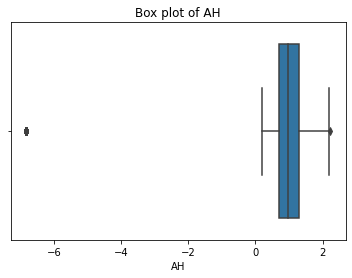

In [84]:
sns.boxplot(data2['AH'])
plt.title('Box plot of AH')

In [85]:
Q1 = np.percentile(data2['AH'],25 , interpolation= 'midpoint')
Q2 = np.percentile(data2['AH'],50 , interpolation= 'midpoint')
Q3 = np.percentile(data2['AH'],75 , interpolation= 'midpoint')
print(Q1)
print(Q2)
print(Q3)

0.6922084921795857
0.9768222346407011
1.2964303779810145


In [86]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-0.21412433652255747
2.2027632066831577


In [87]:
outlier = []
for x in data2['AH']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [88]:
ind1 = data2['AH']>up_lim
data2.loc[ind1].index

Int64Index([4462], dtype='int64')

<AxesSubplot:xlabel='AH'>

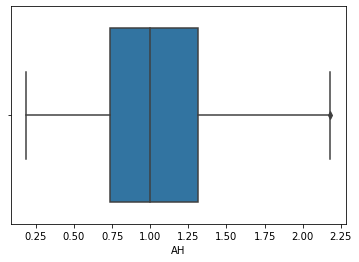

In [89]:
data2 = data2[(data2['AH'] > low_lim) & (data2['AH'] < up_lim)]
sns.boxplot(data2['AH'])

# c) Standardization/Normalization

In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data2_scaler=scaler.fit_transform(data2)
data2.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1146.00,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1146.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


# 3. Exploratory Data Analysis

In [91]:
# Finding the mean,standard deviation, quartile values, minimum, maximum and count of the features
data2.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8988.000000,8988.000000,8988.000000,8988.000000,8988.000000,8988.000000,8988.000000,8988.000000,8988.000000,8988.000000,8988.000000,8988.000000
mean,1.781053,1086.237455,9.448571,923.139167,205.563529,813.560646,107.855596,1448.463266,999.060470,18.309363,49.238512,1.025363
std,0.821536,188.730595,5.925927,234.959948,139.447953,206.084464,34.653513,285.041561,350.135073,8.825351,17.309747,0.403674
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,58.000000,993.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,936.750000,4.434582,734.250000,112.000000,657.750000,85.000000,1226.437500,731.250000,11.775000,35.825000,0.736668
50%,1.500000,1062.750000,8.239851,909.000000,141.000000,805.500000,96.000000,1462.750000,963.250000,17.750000,49.550000,0.995318
75%,2.600000,1231.250000,13.988478,1116.250000,280.000000,969.500000,132.000000,1673.500000,1273.562500,24.400000,62.500001,1.313671
max,3.000000,1406.000000,20.000000,1298.000000,497.000000,1146.000000,171.000000,1886.000000,1577.000000,43.424999,88.725000,2.180639


# a) Univariate Analysis

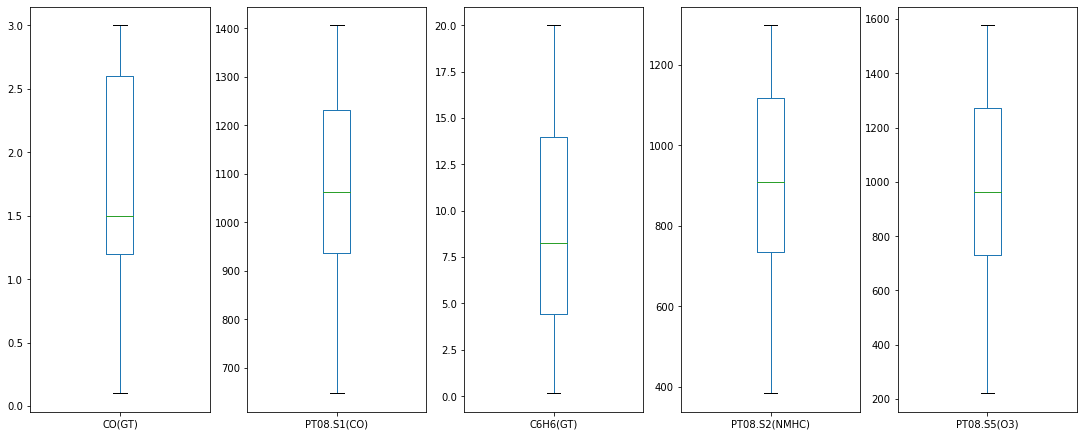

In [92]:
# Perform Univariate Analysis using Box plot
plt.subplot(151)
data2['CO(GT)'].plot.box(figsize=(15,6))
plt.tight_layout(pad=0.5)

plt.subplot(152)
data2['PT08.S1(CO)'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(153)
data2['C6H6(GT)'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(154)
data2['PT08.S2(NMHC)'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(155)
data2['PT08.S5(O3)'].plot.box()
plt.tight_layout(pad=0.5)

In [93]:
# Perform Univariate Analysis using Density plot

<AxesSubplot:xlabel='T', ylabel='Density'>

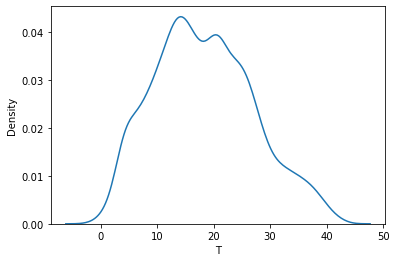

In [94]:
sns.kdeplot(data2['T'])

<AxesSubplot:xlabel='T', ylabel='Density'>

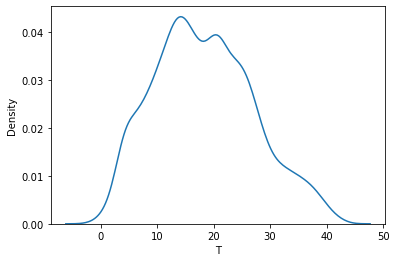

In [95]:
sns.kdeplot(data2['T'])

<AxesSubplot:xlabel='AH', ylabel='Density'>

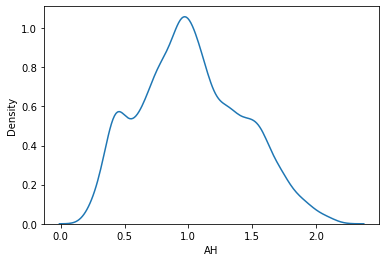

In [96]:
sns.kdeplot(data2['AH'])

# b) Bivariate Analysis

In [97]:
# Perform Bivariate Analysis using pairplot

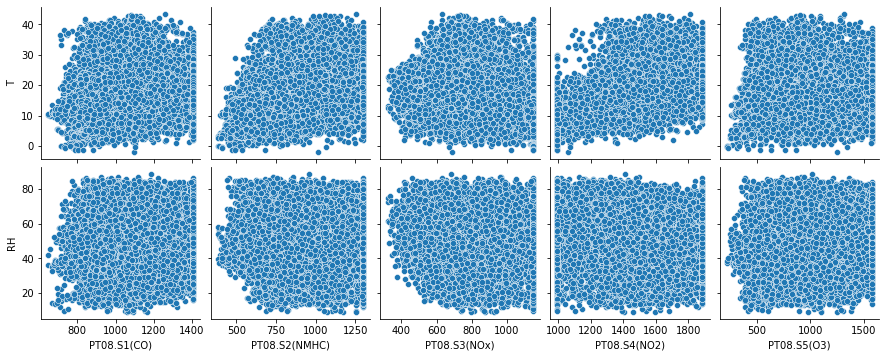

In [98]:
sns.pairplot(
    data2,
    x_vars=['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'],
    y_vars=["T", "RH"],)

# 4. Modelling

In [99]:
#Defining independent and dependent variable
x = data2.drop(['RH'],axis = 1)
y = pd.DataFrame(data2['RH'])

In [100]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [101]:
x_train.shape

(6291, 11)

In [102]:
x_test.shape

(2697, 11)

In [103]:
y_train.shape

(6291, 1)

In [104]:
y_test.shape

(2697, 1)

Since our objective is to predict the 'RH' relative humidity from the given features, we go for Regression.

# a) DecisionTree Regressor Model

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print('MSE is',mean_squared_error(y_test,y_pred))
print("R squared value is : ", r2_score(y_test, y_pred))

MSE is 1.7751969527991078
R squared value is :  0.9940818843801803


# b) LinearRegression Model

In [107]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test,y_pred))

MSE is: 39.616516165734346
R squared value is: 0.8679272613928362


# c) RandomForest Regressor Model

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test,y_pred))

MSE is: 0.45341879814264496
R squared value is: 0.9984884016010862


From the above three model comparison between RandomForest Regressor Model, DecisionTree Regressor Model and LinearRegression Model, the model with least MSE value is RandomForest Regressor Model. Hence, we choose RandomForest Regressor Model for fine tuning.

# 5. Fine Tuning the Model

In [109]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [110]:
#RandomRegressor Model

from sklearn.ensemble import RandomForestRegressor

#Fine tuning the hyper parameters of the model
rf=RandomForestRegressor(n_estimators =1000, oob_score = True,n_jobs =1,random_state =1)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test,y_pred))

MSE is: 0.43892597930664534
R squared value is: 0.9985367174667671


The model have improved from MSE: 0.45341879814264496 to MSE: 0.43892597930664534

# RandomForestRegressor Model is good for 'RH', that is Relative Humidity prediction as per our Environmental Pollution Analysis.